In [2]:
!pip install gensim
!pip install seaborn

In [8]:
import pandas as pd
from gensim.models import Word2Vec
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 学習済みモデルのロード
model_file_path = '../003_research_Word2Vec/KITERETU/gw2v160.model'
model = Word2Vec.load(model_file_path)

In [22]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

# 似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=10)

print("{}に類似する文字列とその類似度は以下の通り".format(input_str))

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
pre.append(input_str)
for prefecture, value in out:
    print(prefecture,"\t",value)
    pre.append(prefecture)

df = pd.crosstab(pre, pre, rownames=['X'], colnames=['Y'])

for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        if model.wv.similarity(i,j) >= 1.0:
            df.loc[i,j]=0.0
        elif model.wv.similarity(i,j) >= 0.6:
            df.loc[i,j]=model.wv.similarity(i,j)
        else:
            df.loc[i,j]=0
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]

print("\nそれぞれの類似度を計算した二次元配列は以下の通り\n",df)


時間に類似する文字列とその類似度は以下の通り
分間 	 0.6840961575508118
分 	 0.6534172296524048
週間 	 0.6310008764266968
日間 	 0.6233595013618469
長時間 	 0.6017537713050842
秒間 	 0.5899543166160583
箇月 	 0.5880022644996643
移動時間 	 0.5837889909744263
数時間 	 0.5768750905990601
丸一日 	 0.5758154392242432

それぞれの類似度を計算した二次元配列は以下の通り
 Y          丸一日         分        分間       数時間        日間        時間        秒間   
X                                                                            
丸一日   0.000000  0.000000  0.000000  0.710663  0.000000  0.000000  0.000000  \
分     0.000000  0.000000  0.802754  0.000000  0.610805  0.653417  0.679986   
分間    0.000000  0.802754  0.000000  0.000000  0.760984  0.684096  0.843481   
数時間   0.710663  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
日間    0.000000  0.610805  0.760984  0.000000  0.000000  0.623359  0.602910   
時間    0.000000  0.653417  0.684096  0.000000  0.623359  1.000000  0.000000   
秒間    0.000000  0.679986  0.843481  0.000000  0.602910  0.000000  0.000000   
移動時間

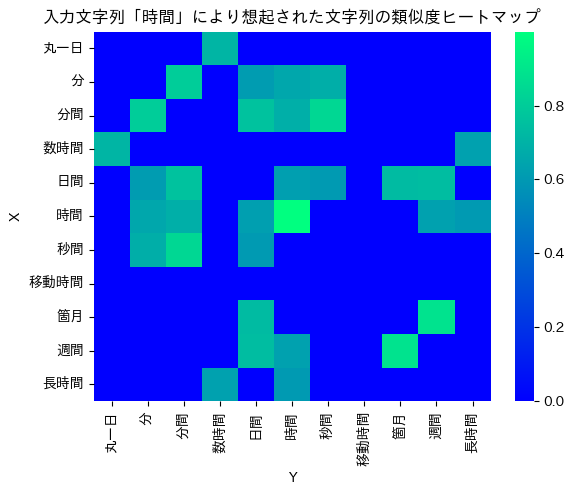

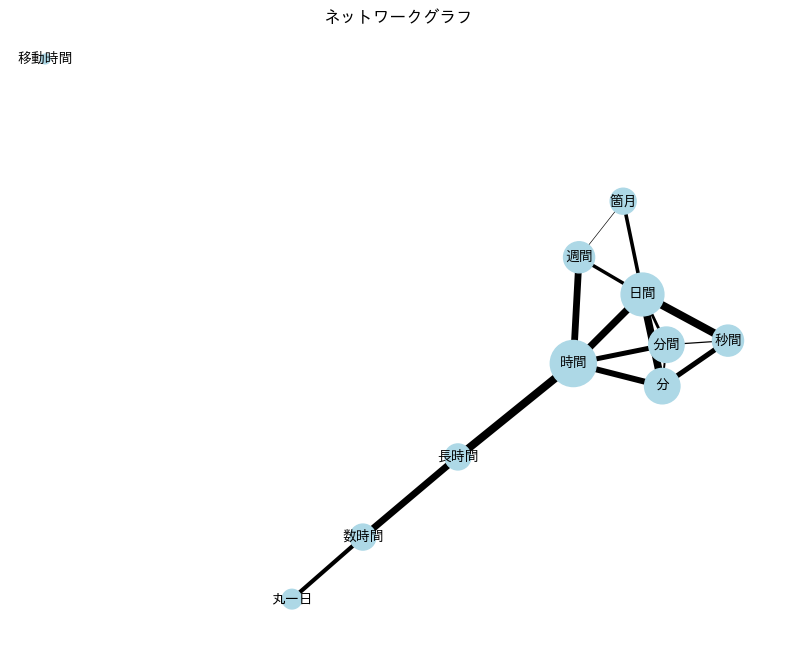

In [23]:
plt.figure()
plt.title("入力文字列「{}」により想起された文字列の類似度ヒートマップ".format(input_str))
sns.heatmap(df,cmap="winter")
plt.savefig('eaborn_heatmap_dataframe.png')

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(len(input_str)+8, len(input_str)+6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [(6 * (1 - weights[edge])) ** 2 for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [50 + 150 * G.degree(node) for node in G.nodes()]

# グラフを描画
japanize_matplotlib.japanize()
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()